# TASK1: Prediction using supervised ML #

Here we use regression method to predict the marks that student are expected to score based upon the hours they spend on studying.

### Import all the libraries required in this notebook. ###


In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### Read data from remote link ####

In [25]:
df_s=pd.read_csv("https://raw.githubusercontent.com/FaheemKhan777/Supervised-ML-for-predicting-number-of-hours-required-to-achieve-maximum-marks/main/student_scores.csv")
df_s.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


#### Checking the data types of columns ####

In [21]:
df_s.dtypes

Hours     float64
Scores      int64
dtype: object

#### Find the correlation between the two variables ####

In [23]:
df_s.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


#### Find any relationship between the datas by plotting them manually ####

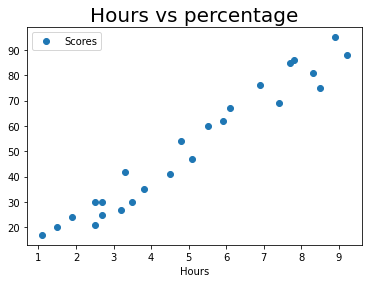

In [60]:
import matplotlib.pyplot as plt
df_s.plot(x='Hours', y='Scores', style='o')
plt.xlabel=('Hours studied')
plt.ylabel=('Scores obtained in percentage')
plt.title('Hours vs percentage', size=20)
plt.show()

#### Prepare the data by dividing them into attributes and labels. ####

In [115]:
X = df.iloc[:, :-1].values  
y = df.iloc[:, 1].values

print(X.shape)
print(y.shape)

(25, 1)
(25,)


#### Now we split the data into training and testing sets using Scikit-Learns built-in train_test_split() method. ###

In [116]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

### Train the algorithm ###

#### Here we create a linear regression and train our algorithm ###

In [117]:
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
lm.fit(X_train, y_train)
print("Training Complete")

Training Complete


#### Now plotting the regression line ####

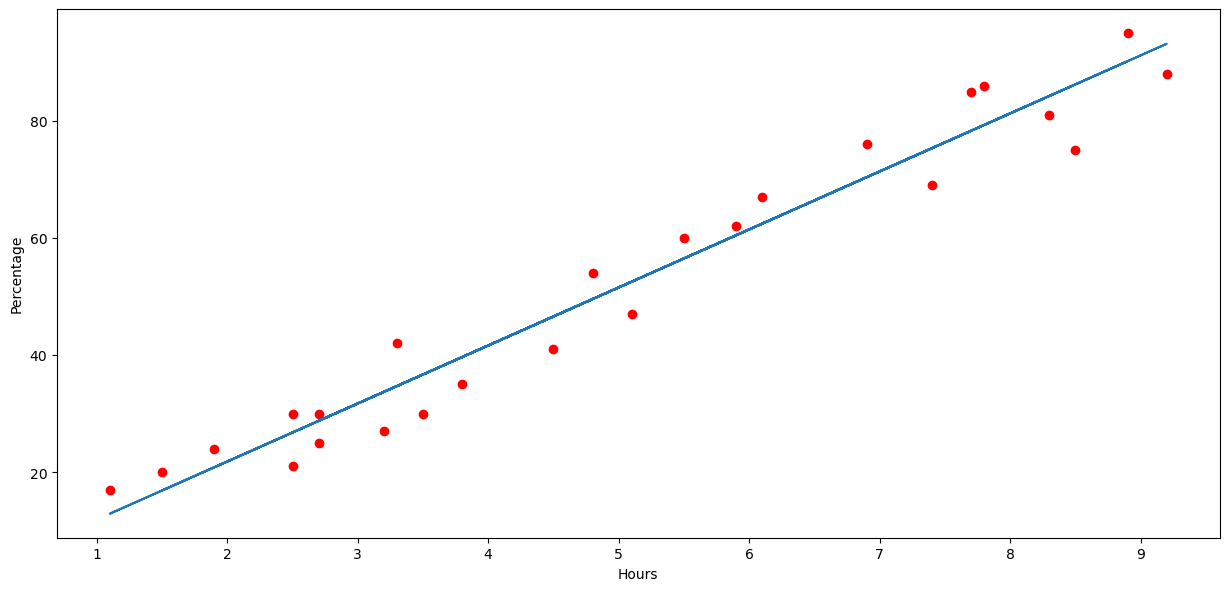

In [118]:
#from importlib import reload
#reload(plt)
slope = lm.coef_
intercept = lm.intercept_
line = slope * X + intercept
plt.figure(figsize=(15,7), dpi=100)
plt.scatter(X,y,color='red')
plt.plot(X,line)
plt.xlabel('Hours')
plt.ylabel('Percentage')
plt.show()

### Making Predictions. ###

#### Here we have to predict the scores for the test data ####

In [119]:
y_pred = lm.predict(X_test)
X_test


df1 = pd.DataFrame({"Actual" : y_test,"Predicted" : y_pred})
df1

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [122]:
X_test

array([[1.5],
       [3.2],
       [7.4],
       [2.5],
       [5.9]])

In [104]:
y_test

array([20, 27, 69, 30, 62], dtype=int64)

In [123]:
print('The shape of the array', y_test.shape)

The shape of the array (5,)


### Visualizing Actual vs Predicted data


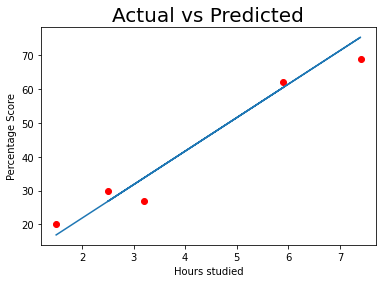

In [128]:
plt.scatter(X_test,y_test,color='red')
plt.plot(X_test,y_pred)
plt.title('Actual vs Predicted',size=20)
plt.xlabel('Hours studied')
plt.ylabel('Percentage Score')
plt.show()

### Evaluating Model

In [129]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
MAE = mean_absolute_error(y_test,y_pred)
MSE = mean_squared_error(y_test, y_pred)
RMSE = np.sqrt(MSE)

In [130]:
print('Mean Absolute Error = {}'.format(MAE))
print('Root Mean Sqaured Error = {}'.format(RMSE))

Mean Absolute Error = 4.183859899002975
Root Mean Sqaured Error = 4.6474476121003665


## What will be predicted score if a student studies for 9.25 hrs/ day?

In [131]:
hours = 9.25
hours1=np.array(hours).reshape(-1,1)
pred_y =lm.predict(hours1)
print('Hours studied = {}'.format(9.25) )
print('Predicted Score = {}'.format(pred_y[0]))

Hours studied = 9.25
Predicted Score = 93.69173248737538


### The predicted score for a student who studied 9.25 hours is 93.69


### Task Completed.